In [ ]:
import sys

import torch
import pandas as pd
import sklearn as sk

print(f"PyTorch Version: {torch.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
print("GPU is", "available" if torch.cuda.is_available() else "NOT AVAILABLE")

In [45]:
import torch
import torchvision
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
%matplotlib inline
import torchvision.transforms as trn
import numpy as np
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader
import torch.nn as nn
import torch.nn.functional as F

In [46]:
dataset = MNIST(root = 'D:\sourav\cs\AI_ML\pytorch\pytorch', download = True)
len(dataset)

60000

# Using multi-layer network to create model

instead of creating a single nn.linear object, we will use two nn.linear objects. each of this is called a layer in the network

the first layer will transform the input matrix of shape batch_size X 784 into an intermidiate output matrix of batch size X hidden_size  where hidden_size is a preconfigured parameter ( eg. 32 or 64 )

the intermidiate outputs are then passed into a non linear activation fxn which operates on individual elements of the output matrix

the result of the activation fxn which is also the size of batch_size X hidden_size is passed into the second layer which transforms it into a matrix of size batch_size X 10, identical to the output of the logistic regression model\

the activation fxn that we use here is a Rectified linear unit or ReLU. it's formula is relu(x) = max(0, x)

In [47]:
dataset = MNIST(root = "D:\sourav\cs\AI_ML\pytorch\pytorch", train=True, transform = trn.ToTensor())

In [48]:
# let us define a function that randomly picks a given fraction of the images for the validation set

np.set_printoptions(suppress = True)
def split_indx(n, val_frct):
    n_val = int(n*val_frct)   # no. of images x faction
    idx = np.random.permutation(n)   # creating random permutation of 0 to n-1
    return idx[n_val:], idx[:n_val]

train_idx, val_idx = split_indx(len(dataset), 0.15)
print(len(train_idx))
print(len(val_idx))

51000
9000


In [49]:
batch_size=100
train(model, train_dl, optimizer, criterion, 100000)
train_sampler = SubsetRandomSampler(train_idx)
train_loader = DataLoader(dataset, batch_size, sampler=train_sampler)

val_sampler = SubsetRandomSampler(val_idx)
val_loader = DataLoader(dataset, batch_size, sampler=val_sampler)

In [50]:
np.set_printoptions(suppress = True)
input_size = 28*28
num_classes = 10
model = nn.Linear(input_size, num_classes)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[-2.8730e-02,  5.3940e-03,  2.0942e-02,  ..., -1.6435e-02,
          2.8908e-02,  2.2794e-02],
        [-7.4438e-04,  2.0715e-02,  1.2021e-02,  ..., -4.0449e-03,
         -1.6498e-02, -3.3138e-02],
        [ 1.1518e-02,  2.0152e-02, -3.3674e-02,  ..., -2.2791e-02,
         -3.1080e-02, -2.0474e-02],
        ...,
        [-9.2046e-03,  1.1879e-02, -9.0071e-03,  ..., -2.0340e-02,
         -3.5342e-02,  2.9506e-02],
        [-2.2155e-02, -3.1205e-03, -2.6973e-02,  ...,  1.0025e-02,
          1.8217e-05,  1.9095e-03],
        [-3.0359e-02, -1.9731e-02,  1.9409e-05,  ..., -3.7476e-03,
         -4.2008e-03, -2.5724e-02]], requires_grad=True)
Parameter containing:
tensor([ 0.0083, -0.0338, -0.0219, -0.0150,  0.0069,  0.0009,  0.0311,  0.0219,
        -0.0208, -0.0141], requires_grad=True)


In [51]:
class MnistModel(nn.Module):
    def __init__(self, in_size, hidden_size1, hidden_size2, out_size):
        super().__init__()  # to inherit the nn.Module class
        self.linear1 = nn.Linear(in_size, hidden_size1)
        self.linear2 = nn.Linear(hidden_size1, hidden_size2)
        self.linear3 = nn.Linear(hidden_size2, out_size)
        # print('self.linear= ', self.linear)
        
    def forward(self, xb):
        # flatten the images tensors
        xb = xb.view(xb.size(0), -1)
        # get intermidiate outputs using hidden layer
        out = self.linear1(xb)
        # apply activation fxn
        out = F.relu(out)
        # get predictions using the output layer
        out = self.linear2(out)
        return out


In [52]:
for xb, yb in train_loader:
    print(xb.shape)
    break
    
for xb, yb in train_loader:
    xb = xb.view(100, 784)   # instead of 100 you can also write xb.size(0)
    # instead of 784 you can write -1 which means that pytorch itself finds the shape because everytime we will not be getting the size
    print(xb.shape)
    break

torch.Size([100, 1, 28, 28])
torch.Size([100, 784])


In [53]:
t = torch.tensor([0, 0.2, -0.3])
F.relu(t)

tensor([0.0000, 0.2000, 0.0000])

In [71]:
input_size = 784
num_classes = 10

model = MnistModel(input_size, 64, 32, num_classes)

In [72]:
for t in model.parameters():
    print(t.shape)

torch.Size([64, 784])
torch.Size([64])
torch.Size([32, 64])
torch.Size([32])
torch.Size([10, 32])
torch.Size([10])


In [73]:
for images, lables in train_loader:
    print('images.shape= ', images.shape)
    outputs = model(images)
    loss = F.cross_entropy(outputs, lables)
    print("loss:", loss.item())
    break

np.set_printoptions(suppress = True)
print('outputs.shape=',outputs.shape)
print("sample outputs=")
print(F.softmax(outputs)[:2].data)
print("sum of probabilities= ", torch.sum(F.softmax(outputs)[0]))

images.shape=  torch.Size([100, 1, 28, 28])
loss: 3.3967785835266113
outputs.shape= torch.Size([100, 32])
sample outputs=
tensor([[0.0314, 0.0316, 0.0326, 0.0304, 0.0349, 0.0354, 0.0366, 0.0341, 0.0310,
         0.0362, 0.0295, 0.0271, 0.0317, 0.0340, 0.0295, 0.0305, 0.0310, 0.0350,
         0.0264, 0.0326, 0.0272, 0.0259, 0.0294, 0.0307, 0.0318, 0.0326, 0.0280,
         0.0314, 0.0323, 0.0277, 0.0294, 0.0321],
        [0.0291, 0.0310, 0.0306, 0.0311, 0.0373, 0.0322, 0.0362, 0.0363, 0.0301,
         0.0355, 0.0282, 0.0269, 0.0281, 0.0347, 0.0282, 0.0315, 0.0292, 0.0357,
         0.0280, 0.0326, 0.0270, 0.0250, 0.0275, 0.0319, 0.0326, 0.0333, 0.0303,
         0.0327, 0.0354, 0.0278, 0.0279, 0.0361]])
sum of probabilities=  tensor(1., grad_fn=<SumBackward0>)


D:\miniconda\envs\torch\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # This is added back by InteractiveShellApp.init_path()
D:\miniconda\envs\torch\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  if sys.path[0] == "":


In [74]:
torch.cuda.is_available()

True

# Creating a fxn that helps us to run our model on GPU

In [75]:
def get_default_device():
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

In [76]:
device = get_default_device()
device

device(type='cuda')

# Define a fxn that can move data and  model to a chosen device

In [77]:
def to_device(data, device):
    # move tensors to the chosen device
    if isinstance(data, (list, tuple)):    # checking if my data is in the form of the list or tuple
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

In [78]:
for images, labels in train_loader:
    print(images.shape)
    images = to_device(images, device)
    print(images.device)
    break

torch.Size([100, 1, 28, 28])
cuda:0


finally we define a DeviceDataLoader class to wrap our existing data loader and move data to the selected device, as a batches are accessed. 

We need is an __iter__  method to retrieve batches of data and an __len__ method ot get the no. of batches 
we will not put all the data to the GPU. 

we will put only some number of batches of data in the GPU

In [79]:
class DeviceDataLoader():
    # wrap a dataloader to move to a device
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
    
    def __iter__(self):
        # yield a batch of data after moving it to the device
        for b in self.dl:
            yield to_device(b, self.device) 
    
    def __len__(self):
        # number of batches
        return len(self.dl)

suppose we call the classDataLoader in a for loop then what yield does is that when the first loop runs it yields the firts batch, when the second loop runs it leaves the first batch and yields the second batch so as there is no load on the GPU

In [80]:
train_dl = DeviceDataLoader(train_loader, device)
valid_dl = DeviceDataLoader(val_loader, device)

In [81]:
for xb, yb in valid_dl:
    print('xb.device=', xb.device)
    print('yb= ', yb)
    break

xb.device= cuda:0
yb=  tensor([6, 8, 8, 3, 4, 0, 7, 6, 0, 5, 6, 8, 4, 7, 6, 0, 6, 7, 6, 2, 5, 6, 9, 5,
        5, 7, 2, 0, 2, 2, 7, 9, 7, 3, 3, 6, 1, 9, 2, 6, 5, 8, 2, 7, 6, 7, 6, 5,
        6, 6, 3, 0, 6, 9, 7, 1, 0, 5, 7, 1, 0, 3, 8, 9, 1, 0, 7, 1, 1, 0, 2, 1,
        6, 5, 8, 0, 0, 2, 2, 0, 3, 0, 4, 4, 1, 7, 8, 3, 3, 9, 8, 8, 4, 4, 8, 9,
        2, 3, 9, 2], device='cuda:0')


# Model

In [82]:
def loss_batch(model, loss_fxn, xb, yb, opt=None, metric=None):
    # generate predictions
    preds = model(xb)
    # calc loss
    loss = loss_fxn(preds, yb)
    
    if opt is not None:
        # compute gradients
        loss.backward()
        # update parameters
        opt.step()
        # reset gradients
        opt.zero_grad()
        
    metric_result = None
    if metric is not None:
        # compute the metric
        metric_result = metric(preds, yb)
    return loss.item(), len(xb), metric_result

In [83]:
def evaluation(model, loss_fn, valid_dl, metric=None):
    with torch.no_grad():
        # for gives the batches out of the validation set
        # metric is the accuracy matrix
        results = [loss_batch(model, loss_fn, xb, yb, metric=metric)
                  for xb, yb in valid_dl]
        # to separate out the lists we use zip function
        losses, nums, metrics = zip(*results)
        # total size is the sum of all the batch size
        total = np.sum(nums)
        # since we have divded the set into batches therefore we can have the last batch size to be smaller than the rest
        # so we first calculate the length and then find its avg value
        # suppose we have a batch of size 3, 3 and 2. so we take the first loss and multipy with 3, take 2nd and multiply with 
        # 3 and then take 3rd loss and muliply with 2. ten sum all the values and then divide by sum of batch size i.e. 3+3+2
        avg_loss = np.sum(np.multiply(losses, nums)) / total
        avg_metric = None
        if metric is not None:
            avg_metric = np.sum(np.multiply(metrics, nums))/total
        return avg_loss, total, avg_metric

In [84]:
def fit(epochs, lr, model, loss_fn, train_dl, valid_dl, metric=None, opt=None):
    losses, metrics = [], []
    
    # instantiate the optimizer
    if opt is None:
        opt = torch.optim.SGD
    opt = opt(model.parameters(), lr = lr)
    for i in range(epochs):
        # Training
        for xb, yb in train_dl:
            loss, length, metric_result = loss_batch(model, loss_fn, xb, yb, opt)
        
        # Evaluation
        result = evaluation(model, loss_fn, valid_dl, metric)
        val_loss, total, val_metric = result
        
        # record the losses
        losses.append(val_loss)
        metrics.append(val_metric)
        
        # printing the progress
        if metric is None:
            print("epoch [", i+1, ',', epochs, '] , loss= ', val_loss)
        else:
            print('*Epoch [', i+1, ',', epochs, '], loss= ', val_loss, ',', metric.__name__, ',' , val_metric)
    
    return losses, metrics

In [85]:
def accuracy(outputs, lables):
    prob, preds = torch.max(outputs, dim=1)
    return torch.sum(preds == lables).item()/len(preds)

In [86]:
model = MnistModel(input_size, 64, 32, num_classes)
to_device(model, device)

MnistModel(
  (linear1): Linear(in_features=784, out_features=64, bias=True)
  (linear2): Linear(in_features=64, out_features=32, bias=True)
  (linear3): Linear(in_features=32, out_features=10, bias=True)
)

In [87]:
val_loss, total, val_acc = evaluation( model, F.cross_entropy, valid_dl, accuracy)
print('loss= ', val_loss, " accuracy= ", val_acc)

loss=  3.484584379196167  accuracy=  0.013444444444444445


In [88]:
losses1, metrics1 = fit(5, 0.5, model, F.cross_entropy, train_dl, valid_dl, accuracy)

*Epoch [ 1 , 5 ], loss=  0.18325834241178302 , accuracy , 0.9486666666666667
*Epoch [ 2 , 5 ], loss=  0.14846514823536078 , accuracy , 0.9593333333333334
*Epoch [ 3 , 5 ], loss=  0.12826246151493656 , accuracy , 0.962
*Epoch [ 4 , 5 ], loss=  0.12212483300310042 , accuracy , 0.9657777777777777
*Epoch [ 5 , 5 ], loss=  0.11606926823862725 , accuracy , 0.9664444444444444


In [89]:
losses2, metrics2 = fit(5, 0.1, model, F.cross_entropy, train_dl, valid_dl, accuracy)

*Epoch [ 1 , 5 ], loss=  0.09590501586596172 , accuracy , 0.9723333333333334
*Epoch [ 2 , 5 ], loss=  0.09507319341517156 , accuracy , 0.9735555555555555
*Epoch [ 3 , 5 ], loss=  0.09303994950734906 , accuracy , 0.9738888888888889
*Epoch [ 4 , 5 ], loss=  0.09406012704388964 , accuracy , 0.9735555555555555
*Epoch [ 5 , 5 ], loss=  0.09428661494619317 , accuracy , 0.9731111111111111


Text(0, 0.5, 'accuracy')

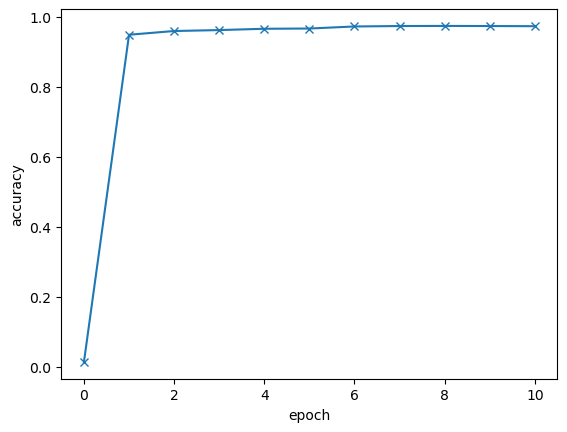

In [90]:
accuracies = [val_acc] + metrics1 + metrics2
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')

# Testing

shape=  torch.Size([1, 28, 28])
label=  7


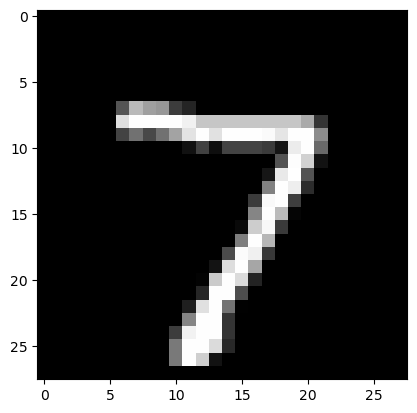

In [91]:
test_dataset = MNIST(root = "D:\sourav\cs\AI_ML\pytorch\pytorch", train = False, transform=trn.ToTensor())
img, label = test_dataset[0]
plt.imshow(img[0], cmap = 'gray')
print('shape= ', img.shape)
print('label= ', label)

In [92]:
test_sampler = SubsetRandomSampler(test_dataset)
test_loader = DataLoader(test_dataset, 50, sampler=test_sampler)

In [93]:
img.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [94]:
def predict_img(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    prob, pred = torch.max(yb, dim=1)
    return pred[0].item()

In [95]:
correct = 0
incorrect = 0
for images, labels in test_dataset:
    images = to_device(images, device)
    x=predict_img(images, model)
    if labels==x:
        correct+=1
    else:
        print('label=', labels, ' prediction=', x)
        incorrect+=1
print("correct=", correct)
print("incorrect=", incorrect)

label= 5  prediction= 6
label= 4  prediction= 9
label= 4  prediction= 2
label= 6  prediction= 0
label= 2  prediction= 7
label= 5  prediction= 3
label= 6  prediction= 0
label= 3  prediction= 5
label= 8  prediction= 2
label= 2  prediction= 8
label= 2  prediction= 6
label= 2  prediction= 1
label= 8  prediction= 4
label= 5  prediction= 8
label= 4  prediction= 9
label= 8  prediction= 2
label= 8  prediction= 9
label= 1  prediction= 2
label= 6  prediction= 0
label= 6  prediction= 5
label= 7  prediction= 1
label= 9  prediction= 5
label= 4  prediction= 6
label= 3  prediction= 7
label= 4  prediction= 6
label= 6  prediction= 1
label= 6  prediction= 8
label= 2  prediction= 4
label= 7  prediction= 2
label= 9  prediction= 4
label= 4  prediction= 9
label= 9  prediction= 5
label= 7  prediction= 1
label= 5  prediction= 9
label= 5  prediction= 7
label= 8  prediction= 3
label= 8  prediction= 6
label= 7  prediction= 9
label= 5  prediction= 6
label= 5  prediction= 3
label= 2  prediction= 3
label= 9  predic